In this notebook, we will continue with decision tree. Building upon that, we introduce boosting. A tree is magnificent, but a forest is even better.

In [4]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import math

#Old stuff


Run the code in this section, this should allow you to use the `TDI02` algorithm which we build for the previous homework. Notice that we turn on the weighting option here for `TDI02`

The following includes my answer to the previous homework.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
Xs = iris['data']
ys = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

In [ ]:
class Node:
    def __init__(self, feature, value, left, right):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right

def showTree(tree):
    print(tree, tree.left, tree.right)
    print(tree.feature, tree.value)
    if (tree.left != None):
        showTree(tree.left)
    if (tree.right != None):
        showTree(tree.right)

Helper functions here

In [ ]:
applying_weight = True

## A function that takes in Xs and ys, and split them into two half based on feature for value
##return leftXs, leftys, data points whose feature is less than OR EQUAL TO the value
##also return rightXs, rightys, data points whose feature is more than the value.
def splits(Xs, ys, feature, value):
    leftXs = [Xs[i] for i in range(len(Xs)) if Xs[i][feature] <= value]
    rightXs = [Xs[i] for i in range(len(Xs)) if Xs[i][feature] > value]
    leftys = [ys[i] for i in range(len(ys)) if Xs[i][feature] <= value]
    rightys = [ys[i] for i in range(len(ys)) if Xs[i][feature] > value]
    return leftXs, rightXs, leftys, rightys

## return true if all the values in ys are the same
def sameClass(ys):
    for i in range(len(ys)):
        if (ys[i] != ys[0]):
            return False
    return True

def ChooseMinErrorPred(Xs, ys, predicates, weighted):
    dataCount = len(Xs)
    if (dataCount == 0):
        return None, None
    minError = np.inf ## or - np.inf
    bestFeature = 0
    bestValue = Xs[0][0]
    #Loop for each feature and value to find the best match to reduce the error
    for feature in predicates:
        valueList = [X[feature] for X in Xs]
        valueSet = set(valueList)
        for value in valueSet:
            leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)
            ## use entropy here.
            entropy1 = entropyOfaBranch(leftys)
            entropy2 = entropyOfaBranch(rightys)
            entropy_value = entropy1 + entropy2
            if(weighted):
                entropy_value = entropy1 * len(leftys) / dataCount + entropy2 * len(rightys) / dataCount
            if (entropy_value < minError):
                bestFeature = feature
                bestValue = value
                minError = entropy_value
    return bestFeature, bestValue

#the comment below is called python docstring
#It's the better standard, than the sloppy comments I have been using
#so I am going to adapt to that.
def entropyOfaBranch(ys):
    """
    input:
    ys, a list of labels on one branch in a decision tree

    output: entropy, a float
    """
    totalResult = 0
    if (len(ys) == 0):
        return 0
    ySet = set(ys)
    for y in ySet:
        prob = ys.count(y) / len(ys)
        totalResult += -1 * prob * math.log(prob)
    return totalResult
## return what class the majority of ys are of, on a branch.
def majorityVote(ys):
    return max(set(ys), key=ys.count)

In [ ]:
def TDI02(Xs, ys, predicates):
    # print(ys)
    if(len(ys) == 0):
        print("THIS SHOULD NEVER HAPPEN NOW", Xs)
        return Node(None,None,None,None)
    if (sameClass(ys)):
        return Node(None, ys[0], None, None)

    ## step 3.
    if (len(predicates) == 0):
        return Node(None, majorityVote(ys), None, None)
    ## step 4
    feature, value = ChooseMinErrorPred(Xs, ys, predicates, applying_weight)
    ## step 5
    # print("branching feature and its value")
    # print(feature, value)
    predicate_index = predicates.index(feature)
    restPredicates = predicates[:predicate_index] + predicates[predicate_index+1:]
    # print(restPredicates)
    ## step 6
    leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)
    # print("Left: ")
    # print(leftXs, leftys)
    # print("Right: ")
    # print(rightXs, rightys)
    if(len(leftXs) == 0 ):
        return TDI02(rightXs, rightys, restPredicates)
    elif(len(rightXs) == 0):
        return TDI02(leftXs, leftys, restPredicates)

    return Node(feature,value,
                TDI02(leftXs, leftys, restPredicates),
                TDI02(rightXs, rightys, restPredicates))

In [ ]:
predicates = list(range(len(Xs[0])))
tree02 = TDI02(Xs, ys, predicates)

In [ ]:
showTree(tree02)

<__main__.Node object at 0x7e7b743934c0> <__main__.Node object at 0x7e7b9fd36770> <__main__.Node object at 0x7e7b74390a00>
2 1.9
<__main__.Node object at 0x7e7b9fd36770> None None
None 0
<__main__.Node object at 0x7e7b74390a00> <__main__.Node object at 0x7e7b74390fd0> <__main__.Node object at 0x7e7b74393490>
3 1.7
<__main__.Node object at 0x7e7b74390fd0> <__main__.Node object at 0x7e7b74393f40> <__main__.Node object at 0x7e7b74393850>
0 7.0
<__main__.Node object at 0x7e7b74393f40> <__main__.Node object at 0x7e7b754bf430> <__main__.Node object at 0x7e7b74393640>
1 2.8
<__main__.Node object at 0x7e7b754bf430> None None
None 1
<__main__.Node object at 0x7e7b74393640> None None
None 1
<__main__.Node object at 0x7e7b74393850> None None
None 2
<__main__.Node object at 0x7e7b74393490> <__main__.Node object at 0x7e7b74390970> <__main__.Node object at 0x7e7b74393880>
0 5.9
<__main__.Node object at 0x7e7b74390970> <__main__.Node object at 0x7e7b74391180> <__main__.Node object at 0x7e7b74393ee0>


In [ ]:
def predict(tree, X):
    if (tree.left == None and tree.right == None):
        return tree.value
    if (X[tree.feature] <= tree.value):
        return predict(tree.left, X)
    else:
        return predict(tree.right, X)
def predictOnXs(tree, Xs):
    predYs = []
    for i in range(len(Xs)):
        predYs.append(predict(tree, Xs[i]))
    return predYs


In [ ]:
predYs = predictOnXs(tree02, Xs)
accuracy_score(ys, predYs)

0.9733333333333334

The accuracy I got here is `0.9733333333333334`

In [ ]:
boolList = []
misclass = []
for s in range(len(predYs)):
  if predYs[s] != ys[s]:
    boolList.append(False)
    misclass.append(s)
  else:
    boolList.append(True)

misclassSample = []
for i in misclass:
  misclassSample.append(Xs[i])
print(misclassSample)

[array([4.9, 2.5, 4.5, 1.7]), array([6. , 2.2, 5. , 1.5]), array([6.3, 2.8, 5.1, 1.5]), array([6.1, 2.6, 5.6, 1.4])]


#Prepare Data

We will work on a more interesting and also harder data set this time.

In [ ]:

bc_data = load_digits()#load_breast_cancer()
Xs = bc_data['data']
ys = bc_data['target']
names = bc_data['target_names']
feature_names = bc_data['feature_names']

We do not want to train and test on the same data set. Because if your model learn everything very well but does not generalize, it is going to get 100% on training, but when tested on new data from the real world, it will perform poorly.

In [ ]:
# prompt: reformat X in a 8 by 8 format

X_shaped = Xs.reshape(-1,8,8)


In [ ]:
Xs[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
X_shaped[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
ys[0]


0

DONE:: examine a few more samples like what I did above. Can you figure out why am I doing that?

In [ ]:
Xs[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [ ]:
X_shaped[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [ ]:
ys[1]

1

In [ ]:
ys

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
X_shaped

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [ ]:
X_shaped[4]

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

In [ ]:
ys[4]

4

In [ ]:
print(len(names))

10


In [ ]:
print(len(feature_names))

64


Let's use off-the-shelf decisino tree on it.

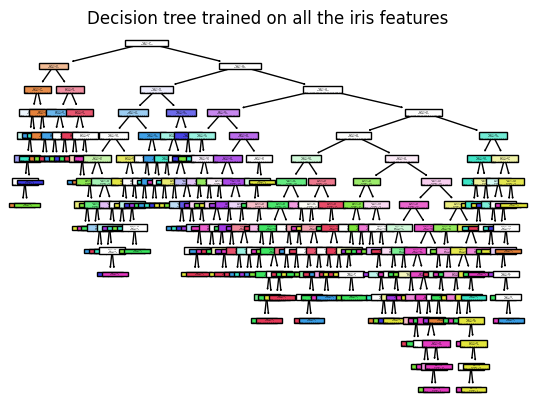

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

plt.figure()
clf = DecisionTreeClassifier().fit(Xs, ys)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

The tree I got was rather complex.

In [ ]:
output = clf.predict(Xs)
print(accuracy_score(ys, output))

1.0


DONE:: why is the accruacy 1.0? Why is the model 100% accurate? The tree is complex. That can be an indicator of an overfit tree. If the tree is overfit then it will perform very well on the data it has trained on.

Another case could be the tree made splits until it was able to classify every sample. Which could lead to very specific splits that would not generalize well.

DONE:: Why is our model earlier, `tree02`, not having the 100% accuracy? `tree02` does not have 100% accuracy because in that algorithm when there were no predicates left, a majority vote is taken on the samples in each split if the split is not comprised of all one class. The majority vote can lead to some samples being misclassified.

DONE:: Once you figured out what the samples are, explain why the off-the-shelf tree is so complex. The tree is complex because there is a large amount of feature names, as well as, target names. This alone will cause the tree to have a greater number of splits than a decision on the iris set which only has four features and four targets. Opposed to the new dataset which has 10 targets and 64 features.

#Split training and testing

Use `train_test_split()` to split your `Xs` and `ys`, using the random seed 42. This is for reproducibility reason, using the same random seed, you will get the same result as I did.

In [ ]:
#DONE split your training and testing data
X_train, X_test, y_train, y_test = train_test_split(Xs,ys,test_size = 0.25,random_state = 42)


Test our off-the-shelf decision tree on this data set again.

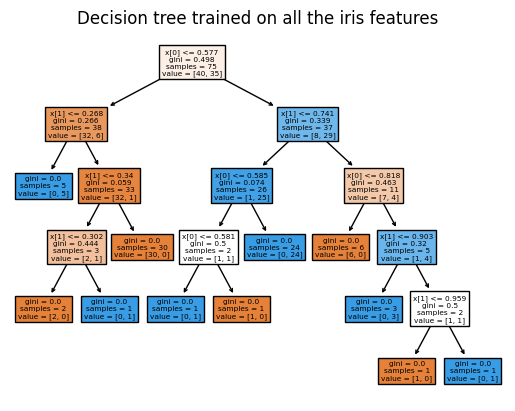

In [ ]:
#DONE train on training set but testing on testing set.
plt.figure()
clf = DecisionTreeClassifier().fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()


In [ ]:
output = clf.predict(X_test)
print(accuracy_score(y_test, output))

0.88


Using a off-the-shelf decision tree is nice. The down side is that it becomes hard to optimize or fine tune for your own purpose. It's like you bought a toy robot that comes with its own movement sets, but if you want it to make a special move, you may need to open the robot, read the manual, figure out the wiring, detach certain thing, attach your own thing...

In this case, we want to test adaboosting, which will allow us to select features and assign weights to samples. We can't easily do adaboost with the off-the-shelf model.


Let's first use one of our tree02 to fit with the data set. Repeat the process of splitting and training and testing above, but for `TDI02`

In [ ]:
#DONE split
X_train, X_test, y_train, y_test = train_test_split(Xs,ys,test_size = 0.25,random_state = 42)

In [ ]:
#DONE train your tree
predicates = list(range(len(X_train[0])))
tree02 = TDI02(X_train, y_train, predicates)

#DONE show your tree using showTree()
showTree(tree02)

<__main__.Node object at 0x7e7b702b7a00> <__main__.Node object at 0x7e7b73f8d150> <__main__.Node object at 0x7e7b702b69b0>
0 0.57561871615655
<__main__.Node object at 0x7e7b73f8d150> <__main__.Node object at 0x7e7b71e3ee60> <__main__.Node object at 0x7e7b73f980a0>
1 0.24515287977901534
<__main__.Node object at 0x7e7b71e3ee60> None None
None True
<__main__.Node object at 0x7e7b73f980a0> None None
None False
<__main__.Node object at 0x7e7b702b69b0> <__main__.Node object at 0x7e7b73f8d000> <__main__.Node object at 0x7e7b702b73a0>
1 0.723229776709919
<__main__.Node object at 0x7e7b73f8d000> None None
None True
<__main__.Node object at 0x7e7b702b73a0> None None
None False


In [ ]:
#DONE test your decision tree
predYs = predictOnXs(tree02, X_test)
accuracy_score(y_test, predYs)

0.88

I got `0.92` as the accuracy. Yours should be similar.

#10 fold cross validation

In our last homework, we did something like this. Run the following code, it should work, but takes about 2-3 minutes

In [7]:
import random
def train_test_split_ratio(Xs, ys, ratio=0.25):
    """
    Splits a data set of Xs and ys into a training set and a testing set.
    Each set has its own Xs and ys. If ratio is 0.25, then 25% of all cases are testing,
    the rest is for training.

    Args:
        Xs: A list of arrays.
        ys: A list of labels.
        ratio: The ratio of the training set to the testing set.

    Returns:
        A tuple of two tuples. The first tuple contains the training set's Xs and ys.
        The second tuple contains the testing set's Xs and ys.
    """
    indices = list(range(len(Xs)))
    train_size = int(len(Xs) * (1 - ratio))
    random.shuffle(indices)
    # print(Xs)
    train_Xs = Xs[indices][:train_size]
    train_ys = ys[indices][:train_size]
    test_Xs = Xs[indices][train_size:]
    test_ys = ys[indices][train_size:]
    return train_Xs, train_ys, test_Xs, test_ys
def treeScore(tree, Xs, ys):
    predYs = predictOnXs(tree, Xs)
    # print(predYs)
    return accuracy_score(ys, predYs)
def algorithmScoreTrainTest(algorithm, train_Xs, train_ys, test_Xs, test_ys ):
    '''
    evaluate a tree algorithm by training it on the training data set,
    and then testing it on the testing data set

    Args:
        train_Xs, train_ys： training data set's features and labels
        test_Xs, test_ys： testing data set's features and labels

    return:
        a score evaluating how good the algorithm did on the testing data, after it is being trained.
    '''
    predicates = list(range(len(train_Xs[0])))
    theTree = algorithm(train_Xs, train_ys, predicates)
    return treeScore(theTree,test_Xs, test_ys )

test_score = []
ratio = 0.1
average = 0
for repeat in range(10):
    train_Xs, train_ys, test_Xs, test_ys = train_test_split_ratio(Xs, ys, ratio)
    average += algorithmScoreTrainTest(TDI02, train_Xs, train_ys, test_Xs, test_ys )
test_score.append(average/10)

NameError: ignored

In [ ]:
test_score

[0.8755555555555554]

The above code randomly split Xs and ys into ratio of 9 to 1, and train the model with training data set and test the model with testing data set. This process is repeated 10 times, and the average is taken as a measure of the model's performance.

However, because it is randomly split, maybe a sample is always in training and never tested, or maybe it's never in training but always tested on. We want to special split such that it split the data into 10 equal sets (or almost equal). It trains the model on 9 sets and test on 1 set. Moreover, it does this in a rotation manner 10 times: each time, the test set is a different one, and the training set is the remaining 9 sets.

Try to understand the code below. This is called the 10 fold cross validation



In [ ]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
def ten_fold_crossvalidation(model, Xs, ys):
    scores = []
    for train_index, test_index in kf.split(Xs):
        X_train, X_test = Xs[train_index], Xs[test_index]
        y_train, y_test = ys[train_index], ys[test_index]
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores.append(score)
    mean_score = np.mean(scores)
    return mean_score

DONE:: how can you know for sure that every sample is tested at least once in the `ten_fold_crossvalidation`. This requires writing some extra code cells and running them. I want to see that you code proves that every sample is in the test set at least once.

In [ ]:
##DONE

test_samples = []
for train_index, test_index in kf.split(Xs):
  for train_index, test_index in kf.split(Xs):
        X_train, X_test = Xs[train_index], Xs[test_index]
        y_train, y_test = ys[train_index], ys[test_index]
        test_samples.append(X_test)
print(test_samples)

# initialzes an empty list
visited = []

# since test_samples has sublists of test samples at each index we for loop thorugh each sublist
for sublist in test_samples:
  # loops through the elements of the sublist
  for element in sublist:
    # An if condition where each array in visted is looped through.
    # Then np.array_equal(arr, element) is used to chech if the current array is equal to the arr in visted.
    # the whole statement is wrapped in any() to clarify that if any array is equal then return true else false
    if not any(np.array_equal(arr, element) for arr in visited): # used ChatGPT to fix 'ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()'
      # If no array is equal to any array in visted then append the element to visited
      visited.append(element)

# This is the same length as the length of Xs. Thus proving that every sample is used as a test sample.
print(len(visited))
print(len(Xs))


[array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 12.,  0.,  0.],
       [ 0.,  0.,  6., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  8.,  0.,  0.]]), array([[ 0.,  0.,  7., ..., 12.,  3.,  0.],
       [ 0.,  1., 12., ...,  9.,  4.,  0.],
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  3., ...,  8.,  0.,  0.],
       [ 0.,  0.,  5., ...,  1.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  1.,  0.]]), array([[ 0.,  0.,  1., ..., 11.,  2.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ..., 14.,  9.,  0.],
       ...,
       [ 0.,  0.,  8., ..., 16., 12.,  5.],
       [ 0.,  0.,  3., ..., 10., 12.,  4.],
       [ 0.,  0.,  2., ..., 16.,  5.,  0.]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1., 13., ...,  1.,  0.,  0.],
       [ 0.,  0.,  2., ..., 16., 10.,  0.],
       ...,
       [ 0.,  0.,  6.

DONE:: modify the code above so that it can be used to test our `TDI02` easily. In other words, modify `ten_fold_crossvalidation` into `ten_fold_crossvalidation_TDI`

HINT:: Function can be passed in as parameters for another function

In [ ]:
def ten_fold_crossvalidation_TDI(TDI_algorithm, Xs, ys):
    """
    takes a TDI algorithm and a set Xs and ys. Carry out 10-fold
    cross validation by spliting Xs and ys, and train the TDI algorithm
    with the training set, and testing it on the testing set
    The average of the testing accuracy is returned.
    Args:
        TDI_algorithm, the algorithm to be used, e.g. TDI02
    """
    #DONE
    scores = []
    for train_index, test_index in kf.split(Xs):
        X_train, X_test = Xs[train_index], Xs[test_index]
        y_train, y_test = ys[train_index], ys[test_index]

        # get the predicates
        predicates = list(range(len(X_train[0])))

        # train the algorithm
        tree02 = TDI_algorithm(X_train,y_train,predicates)

        # predict y values
        predYs = predictOnXs(tree02, X_test)

        # score based on actual y values
        score = accuracy_score(y_test, predYs)

        # append the score to scores list
        scores.append(score)

    mean_score = np.mean(scores)
    return mean_score


The following should run if you implemented the above correctly. It takes about 2-3 minutes

In [ ]:
ten_fold_crossvalidation_TDI(TDI02, Xs, ys)

0.825856610800745

The ten-fold accuracy I got was `0.825856610800745` for `TDI02`.

It's not that accurate, and it's taking a lot of time too. This is because the tree building process is taking forever, it's going through each predicate, doing the math, trying to find the best split at every step.

##TDI03

Let's save us some time instead.

DONE:: Modify `TDI02` to build a `TDI03` algorithm, that build a tree, but with a max depth. Depth will be an additional parameter for `TDI03`. If the depth is depleted, instead of continuing the recursion, you just take the majority vote.

In [ ]:
def TDI03(Xs, ys, predicates, depth):
    ##DONE..
    # print(ys)
    if(len(ys) == 0):
        print("THIS SHOULD NEVER HAPPEN NOW", Xs)
        return Node(None,None,None,None)
    if (sameClass(ys)):
        return Node(None, ys[0], None, None)

    ## step 3.
    if (len(predicates) == 0) or depth == 0:
        return Node(None, majorityVote(ys), None, None)
    ## step 4
    feature, value = ChooseMinErrorPred(Xs, ys, predicates, applying_weight)
    ## step 5
    # print("branching feature and its value")
    # print(feature, value)
    predicate_index = predicates.index(feature)
    restPredicates = predicates[:predicate_index] + predicates[predicate_index+1:]
    # print(restPredicates)
    ## step 6
    leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)
    # print("Left: ")
    # print(leftXs, leftys)
    # print("Right: ")
    # print(rightXs, rightys)
    if(len(leftXs) == 0 ):
        return TDI02(rightXs, rightys, restPredicates)
    elif(len(rightXs) == 0):
        return TDI02(leftXs, leftys, restPredicates)

    return Node(feature,value,
                TDI02(leftXs, leftys, restPredicates),
                TDI02(rightXs, rightys, restPredicates))


Run the below code

In [ ]:
ten_fold_crossvalidation_TDI(TDI03, Xs, ys)

TypeError: ignored

Now that you have TDI03 implemented, run the code. It should give you a bug.

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-29-703c13c612e5> in <cell line: 1>()
----> 1 ten_fold_crossvalidation_TDI(TDI03, Xs, ys)

<ipython-input-25-3cac8a3ed84b> in ten_fold_crossvalidation_TDI(TDI_algorithm, Xs, ys)
      6         predicates = list(range(len(X_train[0])))
      7
----> 8         tree = TDI_algorithm(X_train, y_train, predicates)
      9         predYs = predictOnXs(tree, X_test)
     10

TypeError: TDI03() missing 1 required positional argument: 'depth'
```
This is because we modified TDI03's signature to take one more parameter.

There are two ways to fix this issue, you either fix the ten_fold_crossvalidation_TDI, which means you will need to fix `TDI02` as well.

or you fix `TDI03` so that `depth` parameter is optional and it has a default value, say 1.

DONE:: take the second route: fix `TDI03` so that `depth` parameter is optional, with a default value of 1. If you are not sure how to do this, read about default parameters in python.

In [ ]:
def TDI03(Xs, ys, predicates, depth=1):
    ##DONE..
    # print(ys)
    if(len(ys) == 0):
        print("THIS SHOULD NEVER HAPPEN NOW", Xs)
        return Node(None,None,None,None)
    if (sameClass(ys)):
        return Node(None, ys[0], None, None)

    ## step 3.
    if (len(predicates) == 0) or depth == 0:
        return Node(None, majorityVote(ys), None, None)
    ## step 4
    feature, value = ChooseMinErrorPred(Xs, ys, predicates, applying_weight)
    ## step 5
    # print("branching feature and its value")
    # print(feature, value)
    predicate_index = predicates.index(feature)
    restPredicates = predicates[:predicate_index] + predicates[predicate_index+1:]
    # print(restPredicates)
    ## step 6
    leftXs, rightXs, leftys, rightys = splits(Xs, ys, feature, value)
    # print("Left: ")
    # print(leftXs, leftys)
    # print("Right: ")
    # print(rightXs, rightys)
    nextDepth = depth - 1
    if(len(leftXs) == 0 ):
        return TDI03(rightXs, rightys, restPredicates,nextDepth)
    elif(len(rightXs) == 0):
        return TDI03(leftXs, leftys, restPredicates,nextDepth)

    return Node(feature,value,
                TDI03(leftXs, leftys, restPredicates,nextDepth),
                TDI03(rightXs, rightys, restPredicates,nextDepth))


DONE:: if the depth is set to 1 as the default, what does this mean for your decision tree? With a depth of 1 the algorithm will only make one split. Then from there it takes a mjority vote of the classes in the left and right branch. Resulting in a very simple tree.

In [ ]:
ten_fold_crossvalidation_TDI(TDI03, Xs, ys)

0.18753258845437615

The accuracy I got was `0.18753258845437615`. You should get a low accuracy too. It was a lot lower than `TDI02`, because it is a less complex tree now. On the other hand, it is faster (mine took 40 sec). So we are trading accuracy for performance.

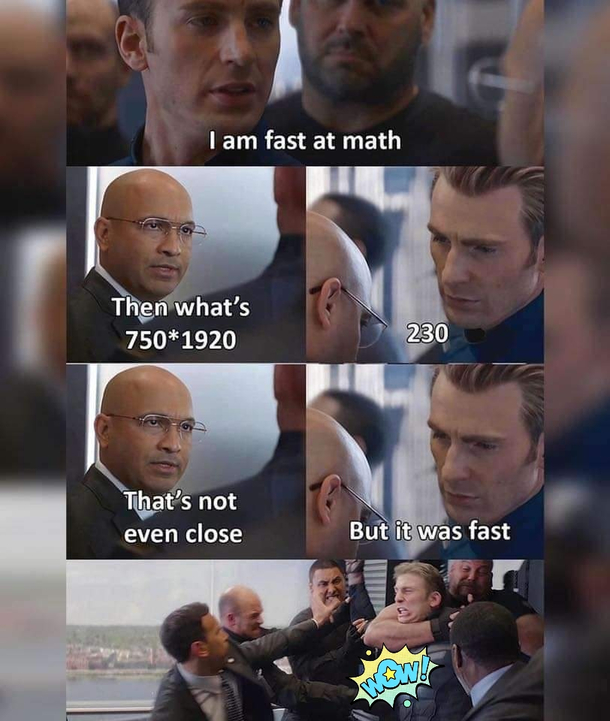

#Emsemble of weaker learners

`TDI03` is definitely a weaker learner than `TDI02`. Next stop, we will use boosting to train a forest of weake learners.

Following two slides are from lecture.

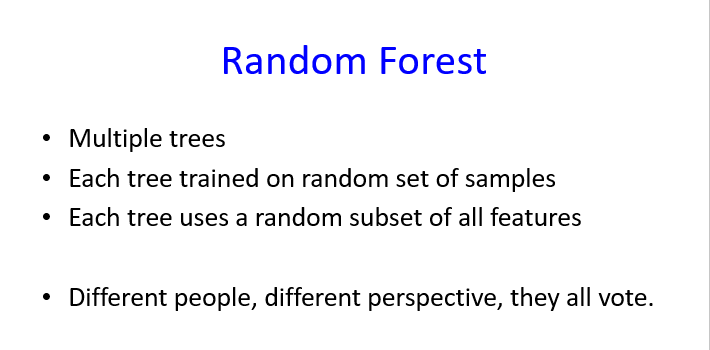

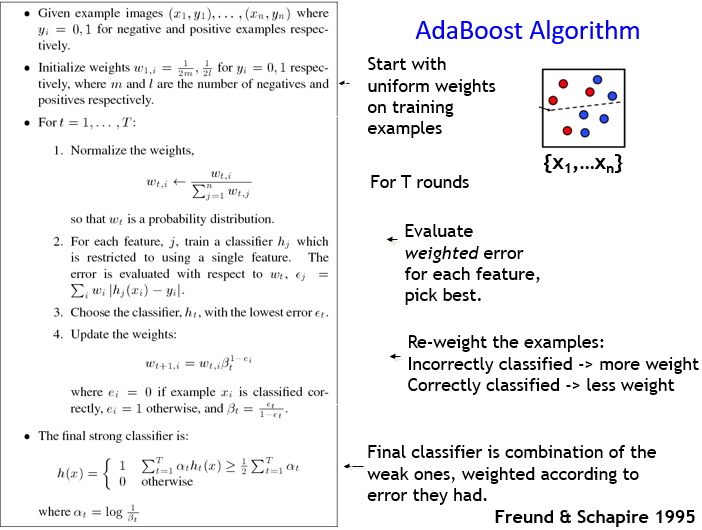

DONE:: Answer in words, what happens to a sample's weight `w_(t+1,i)`, if the sample is correctly classified by the best classifier in iteration `t`?

And what happens if it is misclassified.

If the sample is correctly classified then that sample will have a lower weight. If the sample is incorrectly classified that sample will have an increased weight. In the pseudocode above the weight will change by beta.

****DONE:: What does a high error `e` mean for `beta` and `alpha`? What does `beta` and `alpha` mean? In other words, how is a high error `e` lead to a `beta` and `alpha` value that we want? What's the motivation of this design.

Also answer the same question, but for a low error `e`.

The beta is the value that adjusts the weights of the sample, the alpha is dependent on the beta value and is used in the final classifier.

A high error will result in a greater value for beta. Take two errors, 0.4 and 0.1, using the formula for beta an error of 0.4 means beta equals 0.67 while an error of 0.1 means beta equals 0.12. So, a high error results in a greater value for beta and in turn a greater weight and vice versa.

Using the formula for alpha an error of 0.4 results in a 0.17 alpha value. An error of 0.1 means alpha is equal to 0.92. Assuming log base 10. Therefore, the better classifier has a greater say in the final classifier.

A high error value prioritizes misclassified samples for the next classifier. Therefore, as we create classifiers they will get better at classifying the misclassified examples correctly. That theoretically will create better classifiers as we continue to train the weak learners which is what we want.

For low error. That is, if the samples are already classified correctly there is less emphasis on learning those samples since that learner is already good at classifying those samples. That also means, that classifier will have a greater say in the final classifier because it is good at classifying a set of samples.

Extra credit (1) HARD ****DONE:: There is a fundamental flaw in the pseudocode algorithm above. Think about when `e_t` is more than 0.5. What happens then?

Why is 0.5 seems so important here?

When is the algorithm above fundamentally problematic.

To answer this question, requires some research outside. You will probably need to look up adaboost elsewhere to find inspirations.

HINT:: it's not about the tree. The tree is fine. We applied `TDI02` and `TDI03` on the MNIST data set and they work alright.

When e_t is greater than 0.5 that means the error of the weak learner is worse than randomly guessing. If all of your weak learners are worse than randomly guessing then your final classifier will not be very good. I believe that is when the fundamental problem of the algorithm appears.

If you are able to answer the question above, you may realize that the algorithm is not suitable for the MNIST data set. If you didn't answer the question above and don't have this realization yet, that's fine. Just tag along.

Because this algorithm is not suitable for the MNIST data set, we will instead switch to a different data set. Run the following code.

DONE:: run the following code, explain what it is doing. You may want to add some extra code to test your hypothesis.

In [ ]:
label1 = 4
label2 = 5

indices = np.where(np.any([ys == 4, ys == 5], axis=0))
indices = indices[0]
#print(indices)
np.random.shuffle(indices)
#print(indices)


small_Xs = Xs[indices]
small_ys = ys[indices]

#convert all label1 into 0s and label2 into 1s
new_small_ys = np.where(small_ys == label1, 0, 1)
small_ys = new_small_ys


The code above is finding any samples that have a y value of 4 or 5. After finding those samples,
the indices of those samples are shuffled.

After finding and shuffling the indices two arrays are created using the new indices. One for the Xs and the ys. Then any y value that equals label1 is set to 0 and otherwise is 1.

The summary is indices from the original data frame are found that equals label1 or label2. Then a new set of Xs and ys are created where if the y value is equal to label1 then it will be 0 otherwise the y value will be 1.

In [ ]:
len(new_small_ys)

363

In [ ]:
print(np.sum(small_ys == 0))

181


In [ ]:
print(np.sum(small_ys == 1))

182


Test our TDI03 with different depth on it. This requires you modifying the code above everytime you run. Remember to switch it back to depth = 1 after your experiments.

In [ ]:
ten_fold_crossvalidation_TDI(TDI03, small_Xs, small_ys)

0.978078078078078

DONE: what's the accuracy when you set depth to 1?
The accuracy when at depth 1 is 0.9259009009009007


DONE: what's the accuracy when you set depth to 2?
 The accuracy when at depth 2 is 0.9643393393393392


DONE: what's the accuracy when you set depth to 4?
The accuracy when at depth 4 is 0.978078078078078


****DONE Why do I choose the labels to be 4 and 5, why not 1 and 0?

HINT:: I am trying to make the problem harder so that the weak learner struggles.

You choose the labels 4 and 5 because those are the hardest to classify. This will force the weak learners to become better and eventually create a stronger final classifier than if they learned on easy labels.

We want a weak learner, so let's set depth to 1. Before we do our emsemble, make sure you run the right code block after you change the depth's default value, so that it takes effect.

HARD TODO:: Based on these two slides, we will build an adaboosting algorithm that boost our `TDI03` trees.

Despite the pseudocode algorithm above, there are several designs that we will not follow exactly.

1. The pseudocode uses only one feature for each classifier, because it is using decision stump. We, instead, uses a decision tree. However, because we set the default value of depth to 1, effectively, we are also using decision stumps.

2. We will randomly select a subset of predicates and a subset of samples, to train each weak learner. This is not reflected in the pseudocode. More specificially, we will train with `length_of_sub_predicates = 10 ` number of predicates in each weak learner and train with
`length_of_subset_samples = 100` samples for each weak learner. You may skip this step but train on all predicates and all samples for each weak learner.

3. Because of #2 above, there are so many possibility of choosing your subset of predicates and subset of samples, and each choice will lead to one different weak learner. For the sake of efficiency, we will not test them all to find the best weak learner in each iteration. Instead, we will only test `number_of_models_to_try = 10` models before deciding on the best weak learner. You may skip this step to test all possible models.

4. So point #2 and #3 are really about the efficiency of the algorithm. I implemented with them, and I think you can implement without them. In this example, there aren't many samples or predicates, so I think skipping #2 and #3 is fine. But you still want to follow the pseudocode closely.

5. For each weak learner, you will train on a subset of the samples if you used `length_of_subset_samples = 100` like I did. If you didn't, that's fine. But you always  test on the full set of samples. Because you want to update weight for the full set of samples based on how well the weak learner performs on all of them.

This is a very hard step, it requires you to have the skill of understanding mathematical formulas, the computer science behind boosting, and the ability to code based on pseudocode.

Most of the real CS papers on algorithms or AI have some sort of pseudocode like this. This is a vital skill to practice and gain.

In [ ]:
from numpy.ma.core import argmin
from operator import length_hint
T = 10 # number of weak learners
length_of_sub_predicates = 10 # number of predicates in each weak learner
length_of_subset_samples = 100 # number of samples in training each weak learner
number_of_models_to_try = 10 # number of weak learners to try
def TDI03_adaBoost(Xs, ys, predicates):
    '''
    Args:
        Xs, ys, the training data set
        predicates, a list of predicates

    Returns:
        models, a list of weak learners
        beta_t_s, a list of betas, one for each weak learner
    '''


    ##DONE

    ##HINT:: The hardest formula I have to write is here
    ## weights = weights * np.power(beta_t, (ys != predictOnXs(best_model, Xs)))
    ## Yours might be different depending on your approach.
    ## I am leaving mine here as a hint of what kind of np functions you can use.

    # initialize lists
    beta_t_s = []
    models = []
    weights = []

    # initialize weights
    for i in range(length_of_subset_samples):
      weights.append(1/length_of_subset_samples)

    # for T rounds
    for t in range(T):

      # normalize the weights
      if t!= 0:
        total_weight = sum(weights)
        for i in range(len(weights)):
          weights[i] /= total_weight

      # initialize weak model list
      weak_models = []

      # build 10 models to try
      for i in range(number_of_models_to_try):

        # Get 100 random samples for training
        indices = list(range(len(Xs)))
        np.random.shuffle(indices)
        random_indices = indices[:length_of_subset_samples]
        subset_samples_Xs = Xs[random_indices]
        subset_samples_ys = ys[random_indices]

        # get 10 random predicates for training
        preds = list(range(len(predicates)))
        np.random.shuffle(preds)
        subset_predicates = preds[:length_of_sub_predicates]

        # train a classifier
        h = TDI03(subset_samples_Xs,subset_samples_ys,subset_predicates)
        weak_models.append(h)

      # initialize list that holds error for each weak classifier
      total_errors = []

      # get error for each weak model
      for h in weak_models:
        weights_of_errors = []
        for index in range(len(weights)):
          predY = predict(h, subset_samples_Xs[index])

          actualY = subset_samples_ys[index]

          weight = weights[index]

          if(predY != actualY):
            weights_of_errors.append(weights[index])



        # appends the error for model h to total errors list
        total_errors.append(sum(weights_of_errors))

      # choose classifier with lowest error
      lowest_error = min(total_errors)
      index = total_errors.index(lowest_error)
      lowest_error_classifier = weak_models[index]
      models.append(lowest_error_classifier)

      # update the weights
      beta_t = lowest_error/(1-lowest_error)
      beta_t_s.append(beta_t)

      for i in range(len(weights)):
        predY = predict(lowest_error_classifier, subset_samples_Xs[i])
        actualY = subset_samples_ys[i]
        if(predY==actualY):
          e_i = 1
        else:
          e_i = 0
        weights[i] = weights[i] * beta_t ** e_i

    return models,  beta_t_s

In [ ]:
predicates = range(len(Xs[0]))
TDI03_adaBoost(Xs,ys,predicates)

([<__main__.Node at 0x7f41ec68dbd0>,
 [3.000000000000007,
  2.6585365853658627,
  2.7665402444163365,
  2.5908372338045624,
  1.7366346210703754,
  2.5129087823870857,
  1.3865264167698066,
  4.264641495735642,
  2.485839353726123,
  2.256940956678445])

TODO:: implement `adaBoost_predict(models,  beta_t_s, Xs)`, that uses the weak learners trained by `TDI03_adaBoost` to make a classification decision



In [ ]:
def adaBoost_predict(models,  beta_t_s, Xs):
    '''
    Args:
        models, a list of weak learners
        beta_t_s, a list of betas, one for each weak learner
        Xs, the test data set

    Returns:
        pred_ys, the predicated classification of the test data.
    '''
    ##DONE
    pred_ys = np.zeros(len(Xs))
    beta_t_s = np.array(beta_t_s)

    alpha_t_s = np.log(1/beta_t_s)
    alpha_t_sum = sum(alpha_t_s)

    for t in range(T):
      prediction_t = predictOnXs(models[t], Xs)

      for index in range(len(pred_ys)):
        pred_ys[index] += alpha_t_s[t] * prediction_t[index]

    for index in range(len(pred_ys)):
      if(pred_ys[index] >= (1/2)*alpha_t_sum):
        pred_ys[index]=1
      else:
        pred_ys[index]=0


    return pred_ys


After you are done with the two steps above, run the following to train and test your adaboost.

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    small_Xs, small_ys, test_size=0.1)#, random_state=42)

In [ ]:
models, beta_t_s = TDI03_adaBoost(Xs_train, ys_train, predicates)

In [ ]:
# pred_Ys = adaBoost_predict(models,  beta_t_s, Xs)
predYs = adaBoost_predict(models,  beta_t_s, Xs_test)
# print(ys_test)
accuracy_score(ys_test, predYs)

0.9459459459459459

DONE:: compare the accuracy you gained from your `TDI03_adaBoost`, is it better than your `TDI03`?
The accuracy from TDI03 with ten-fold-cross validation is 0.18753258845437615. Using TDI03_adaBoost the accuarcy is 0.9459459459459459



DONE:: Remember that your `TDI03_adaBoost` is boosting with bunch of `TDI03`s with depth = 1.

Also remember when we modified `TDI03`'s default depth to gain more complex and more accurate model? Which one modified `TDI03` (what's the depth setting of `TDI03`) is comparable to our `TDI03_adaBoost` here in terms of performance.

What do you learn from that comparison?

The accuracy of TDI03_adaBoost is comparable to TDI03 with a depth of 1 or a depth of 2. I learned that my TDI03_adaBoost did not perform as well as I thought it would. However, it is interesting that it is able to do almost as well as a decision tree with a depth of 2 with a group of weak learners.

DONE:: Study the code below which uses an off-the-shelf adaBoost. Why is the accuracy so low? Can you make it higher?

The accuracy is low because we are using one weak learner in our AdaBoost classifier. You can make the accuracy higher by increasing the amount of n_estimators.

DONE:: Why is it still so low, even after you make it higher?

The final classifier may not be suited for our classification problem. Or, the data is not suited for our AdaBoost model. Either way a problem could be the method of our classification.

Another potential issue is the model could be overfitting to the training data.

In [ ]:
# prompt: give me a code for adaboost emsemble training

from sklearn.ensemble import AdaBoostClassifier
scores = []
for train_index, test_index in kf.split(Xs):
    X_train, X_test = Xs[train_index], Xs[test_index]
    y_train, y_test = ys[train_index], ys[test_index]
    predicates = list(range(len(X_train[0])))

    clf = AdaBoostClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    predYs = clf.predict(X_test)

    scores.append(accuracy_score(y_test, predYs))
mean_score = np.mean(scores)
print(mean_score)

0.2604034761018001


DONE:: Write a 10-fold cross validation code for your `TDI03_adaBoost` and `adaBoost_predict(models, beta_t_s, Xs)`

In [ ]:
#TODO
def ten_fold_crossvalidation_ada(TDI03_adaBoost, Xs, ys):
  scores = []
  for train_index, test_index in kf.split(Xs):
      X_train, X_test = Xs[train_index], Xs[test_index]
      y_train, y_test = ys[train_index], ys[test_index]

      # get the predicates
      predicates = list(range(len(X_train[0])))

      # train the algorithm
      models, beta_t_s = TDI03_adaBoost(X_train,y_train,predicates)

      # predict y values
      predYs = adaBoost_predict(models, beta_t_s, X_test)

      # score based on actual y values
      score = accuracy_score(y_test, predYs)

      # append the score to scores list
      scores.append(score)

  mean_score = np.mean(scores)
  return mean_score



In [ ]:
print(ten_fold_crossvalidation_ada(TDI03_adaBoost, small_Xs, small_ys))


0.9421171171171171


DONE:: Run and test your code above, the result should match with the earlier result.

#Weird test on Decision Tree

In [ ]:
# prompt: generate a X with 100 rows, two column, random number

import numpy as np
Xs = np.random.rand(100, 2)
ys = Xs[..., 0] > Xs[..., 1]


In [ ]:
print(Xs[:,1])
print(Xs[0])

[0.20375083 0.80164209 0.12314154 0.69003315 0.9243508  0.94700864
 0.08034551 0.50102086 0.47151385 0.00662816 0.96576547 0.24515288
 0.64437201 0.46811422 0.54622175 0.62816636 0.50357372 0.80182335
 0.06384002 0.25499646 0.65855469 0.49168499 0.44531935 0.46010665
 0.54648355 0.33490483 0.30942568 0.68798865 0.87589126 0.94858285
 0.76332725 0.5964241  0.38798024 0.31677459 0.29337211 0.24492065
 0.9459426  0.58517252 0.56656069 0.81824133 0.2903077  0.99735254
 0.69157181 0.92018693 0.67917788 0.6664927  0.08470267 0.37404047
 0.97382186 0.20130093 0.05537868 0.0108563  0.4642029  0.40851855
 0.69920845 0.4516085  0.75797682 0.88134129 0.30588065 0.79778337
 0.7924265  0.12543304 0.43258604 0.85281305 0.03219238 0.39645402
 0.86909949 0.14297262 0.42410102 0.24805576 0.38741699 0.80716242
 0.91420514 0.56791305 0.06741793 0.72322978 0.95850309 0.19243176
 0.44772136 0.37712095 0.39692514 0.96753822 0.29718339 0.06268187
 0.76247765 0.36034202 0.85793837 0.9998584  0.0577804  0.7960

With the above code, I generated a table of artificial data. You can consider this as a data of basketball games, where the first column of `X` is the points of home team, and the second column of X is the points of the away team, and `ys` is the game result indicating whether the home team won or not.

In [ ]:
ys

array([ True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
        True])

In [ ]:
# prompt: count the number of y that is more than 1

np.sum(ys)


49

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    Xs, ys, test_size=0.5, random_state=42)

In [ ]:
clf = DecisionTreeClassifier().fit(Xs_train, ys_train)
output = clf.predict(Xs_test)
print(accuracy_score(ys_test, output))

0.86


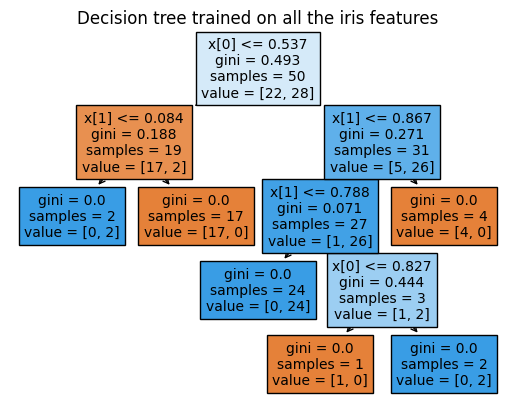

In [ ]:
plt.figure()
# clf = DecisionTreeClassifier().fit(Xs, ys)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [ ]:
print(Xs[1])
print(ys[1])
print(output[1])

[0.53703068 0.80164209]
False
False


This is amazing.

At the beginning when I thought of this data set, I thought it would be impossible for decision tree to solve.
Because the true hidden pattern for y, depends on the relation between x[1] and x[2].

Techincally, if we just input x toward the training algorithm, the algorithm nor the model knows that they need to look into the relation between x[1] and x[2]. In fact, this is a fundamental flaw of decision tree. It only works with the attribtues it has been given, but assumes independence between these attributes.

BUT, somehow, they came up with a model, with moderately good accuracy.

DONE::

Explain what's going on. Why the accuracy is actually not bad. You may modify the code to try more experiments.

Assuming the decision tree above uses predicates and splits based on the predicate and value pair that results in the least entropy. It is not surprising that there is no split based on a value of the first column AND a value in the second column. Since only one feature is chosen at a time.

The accuracy is not bad because the relationship can have a pattern. Take for example one row in Xs where Xs[0,0] = 64 and Xs[0,1] = 82, if we use the example above where the first column is a home team and the second column is an away team then there can be a pattern in the number of points scored by a team that likely means that team won. So, even though the decion tree did not model the relationship exactly based on patterns in the data it approximated that pattern by splitting on threshold based on the number of points scored by a given team.

Additionally, the tree can model that relationship where
X[0] < X[1] by making two splits. Assume the following data,
[64,82, False
 43,96, False
 65,57, True
 43,32, True
 72,68, False]

The first split could be Xs[:,1] >= 82; right branch = False ; left branch = Xs[:,0] <= 65 ; left branch = True ; right branch = False.

In this example there is a general pattern and even though it does not model the exact relationship, the model can be approximated with multiple splits.

#The way that can be told ...

In [8]:
import numpy as np
Xs = np.random.rand(100, 3)
ys = Xs[..., 0]*Xs[..., 2] < Xs[..., 1]*Xs[..., 1]


In [9]:
print(Xs)
print(ys)

[[7.92479986e-01 6.85882657e-02 4.14987255e-02]
 [1.30352888e-02 5.91762223e-01 3.94947847e-01]
 [5.89657221e-01 9.19643909e-01 4.50673495e-01]
 [1.30944181e-02 6.88082109e-01 6.81526850e-03]
 [2.07473651e-01 5.61969721e-01 6.24320882e-02]
 [3.04578401e-01 2.54917781e-01 5.23472140e-01]
 [5.16562070e-01 8.12878249e-01 1.44922284e-01]
 [4.55351026e-01 9.67990162e-01 1.56156021e-01]
 [2.68349715e-01 2.00897415e-01 3.97990283e-01]
 [2.29380757e-01 2.69043610e-01 1.61563799e-02]
 [3.73795009e-01 4.59719966e-01 7.89768699e-01]
 [9.23234709e-01 8.23637026e-01 3.57230975e-01]
 [4.95954026e-01 5.10291719e-01 5.09040534e-02]
 [7.94647291e-02 8.14284225e-01 7.47186042e-01]
 [2.25766148e-01 5.31489478e-01 7.87458564e-02]
 [4.12892342e-01 1.77026915e-01 9.63168333e-01]
 [6.82108521e-03 9.19232183e-01 3.30647987e-01]
 [6.70430781e-01 2.17606399e-01 2.64936884e-01]
 [5.48155275e-01 1.99534425e-01 9.39218423e-01]
 [1.70801443e-01 6.48477821e-01 1.69907450e-01]
 [7.11879451e-01 9.74170582e-01 1.320056

In [5]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    Xs, ys, test_size=0.5, random_state=42)

In [6]:
clf = DecisionTreeClassifier().fit(Xs_train, ys_train)
output = clf.predict(Xs_test)
print(output)
print(accuracy_score(ys_test, output))

NameError: ignored

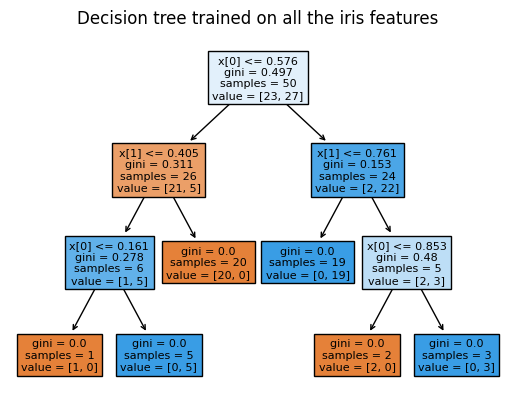

In [ ]:
plt.figure()
# clf = DecisionTreeClassifier().fit(Xs, ys)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

is not the eternal way.

DONE::
Make-up a difficult data set for decision tree.

Your data set should make sense. The Xs and the ys should have some relationship. In other words, when you generate your data, the y value should follow some rule and be determined by the X value.

By "difficult", I mean that decision tree when tested under 10-fold cross-validation, shouldn't achieve more than 90 percent accuracy.

This is a really interesting and meaningful exercise. In research world, people keep boasting about what their AI can do, but they never talk about what they cannot do. In real world, you run into troubles all the time when using any model.


Remind me in class to discuss different answers you have. Best three difficult datasets voted by yall should receive extra credit (1).